In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

df = pd.read_csv('/content/Foodpanda Analysis Dataset.csv')

# ดูข้อมูลเบื้องต้น
df.head()

,customer_id,gender,age,city,signup_date,order_id,order_date,restaurant_name,dish_name,category,quantity,price,payment_method,order_frequency,last_order_date,loyalty_points,churned,rating,rating_date,delivery_status
0,C5663,Male,Adult,Peshawar,1/14/2024,O9663,8/23/2023,McDonald's,Burger,Italian,5,1478.27,Cash,38,7/19/2025,238,Active,3,10/14/2024,Cancelled
1,C2831,Male,Adult,Multan,7/7/2024,O6831,8/23/2023,KFC,Burger,Italian,3,956.04,Wallet,24,11/25/2024,81,Active,2,8/21/2025,Delayed
2,C2851,Other,Senior,Multan,6/20/2025,O6851,8/23/2023,Pizza Hut,Fries,Italian,2,882.51,Cash,42,5/10/2025,82,Inactive,3,9/19/2024,Delayed
3,C1694,Female,Senior,Peshawar,9/5/2023,O5694,8/23/2023,Subway,Pizza,Dessert,4,231.30,Card,27,7/24/2025,45,Inactive,2,6/29/2025,Delayed
4,C4339,Other,Senior,Lahore,12/29/2023,O8339,8/24/2023,KFC,Sandwich,Dessert,1,1156.69,Cash,35,12/21/2024,418,Inactive,3,3/6/2025,Cancelled


In [4]:
df.shape

(6000, 20)

In [5]:
df.isnull().sum()

,0
customer_id,0
gender,0
age,0
city,0
signup_date,0
order_id,0
order_date,0
restaurant_name,0
dish_name,0
category,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      6000 non-null   object 
 1   gender           6000 non-null   object 
 2   age              6000 non-null   object 
 3   city             6000 non-null   object 
 4   signup_date      6000 non-null   object 
 5   order_id         6000 non-null   object 
 6   order_date       6000 non-null   object 
 7   restaurant_name  6000 non-null   object 
 8   dish_name        6000 non-null   object 
 9   category         6000 non-null   object 
 10  quantity         6000 non-null   int64  
 11   price           6000 non-null   float64
 12  payment_method   6000 non-null   object 
 13  order_frequency  6000 non-null   int64  
 14  last_order_date  6000 non-null   object 
 15  loyalty_points   6000 non-null   int64  
 16  churned          6000 non-null   object 
 17  rating        

In [7]:
df.duplicated().sum()


np.int64(0)

In [8]:
#  Convert data types
date_cols = ['signup_date', 'order_date', 'rating_date','last_order_date']
df[date_cols] = df[date_cols].apply(pd.to_datetime)

In [9]:
df.columns = df.columns.str.strip()


In [10]:
print(df.columns.tolist())


['customer_id', 'gender', 'age', 'city', 'signup_date', 'order_id', 'order_date', 'restaurant_name', 'dish_name', 'category', 'quantity', 'price', 'payment_method', 'order_frequency', 'last_order_date', 'loyalty_points', 'churned', 'rating', 'rating_date', 'delivery_status']


In [11]:
df['price_per_item'] = df['price'] / df['quantity']
df['last_order_date'] = pd.to_datetime(df['last_order_date'], errors='coerce')




In [12]:
print(df.columns.tolist())

['customer_id', 'gender', 'age', 'city', 'signup_date', 'order_id', 'order_date', 'restaurant_name', 'dish_name', 'category', 'quantity', 'price', 'payment_method', 'order_frequency', 'last_order_date', 'loyalty_points', 'churned', 'rating', 'rating_date', 'delivery_status', 'price_per_item']


In [13]:
df.head()

,customer_id,gender,age,city,signup_date,order_id,order_date,restaurant_name,dish_name,category,...,price,payment_method,order_frequency,last_order_date,loyalty_points,churned,rating,rating_date,delivery_status,price_per_item
0,C5663,Male,Adult,Peshawar,2024-01-14,O9663,2023-08-23,McDonald's,Burger,Italian,...,1478.27,Cash,38,2025-07-19,238,Active,3,2024-10-14,Cancelled,295.654
1,C2831,Male,Adult,Multan,2024-07-07,O6831,2023-08-23,KFC,Burger,Italian,...,956.04,Wallet,24,2024-11-25,81,Active,2,2025-08-21,Delayed,318.680
2,C2851,Other,Senior,Multan,2025-06-20,O6851,2023-08-23,Pizza Hut,Fries,Italian,...,882.51,Cash,42,2025-05-10,82,Inactive,3,2024-09-19,Delayed,441.255
3,C1694,Female,Senior,Peshawar,2023-09-05,O5694,2023-08-23,Subway,Pizza,Dessert,...,231.30,Card,27,2025-07-24,45,Inactive,2,2025-06-29,Delayed,57.825
4,C4339,Other,Senior,Lahore,2023-12-29,O8339,2023-08-24,KFC,Sandwich,Dessert,...,1156.69,Cash,35,2024-12-21,418,Inactive,3,2025-03-06,Cancelled,1156.690


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   customer_id      6000 non-null   object        
 1   gender           6000 non-null   object        
 2   age              6000 non-null   object        
 3   city             6000 non-null   object        
 4   signup_date      6000 non-null   datetime64[ns]
 5   order_id         6000 non-null   object        
 6   order_date       6000 non-null   datetime64[ns]
 7   restaurant_name  6000 non-null   object        
 8   dish_name        6000 non-null   object        
 9   category         6000 non-null   object        
 10  quantity         6000 non-null   int64         
 11  price            6000 non-null   float64       
 12  payment_method   6000 non-null   object        
 13  order_frequency  6000 non-null   int64         
 14  last_order_date  6000 non-null   datetim

In [15]:
# เลือกเฉพาะคอลัมน์ numeric
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

# descriptive statistics
desc_stats = numeric_cols.describe()
print("📌 Descriptive Statistics for Numeric Columns:")
print(desc_stats)


📌 Descriptive Statistics for Numeric Columns:
          quantity        price  order_frequency  loyalty_points       rating  \
count  6000.000000  6000.000000      6000.000000     6000.000000  6000.000000   
mean      2.991667   800.524880        25.304667      250.173667     2.996833   
std       1.414778   404.855029        14.358930      144.608478     1.406113   
min       1.000000   100.300000         1.000000        0.000000     1.000000   
25%       2.000000   441.997500        13.000000      125.000000     2.000000   
50%       3.000000   806.460000        25.000000      249.500000     3.000000   
75%       4.000000  1149.737500        37.000000      378.000000     4.000000   
max       5.000000  1499.950000        50.000000      500.000000     5.000000   

       price_per_item  
count     6000.000000  
mean       367.786148  
std        322.803695  
min         20.060000  
25%        149.213750  
50%        265.493750  
75%        461.621667  
max       1499.680000  


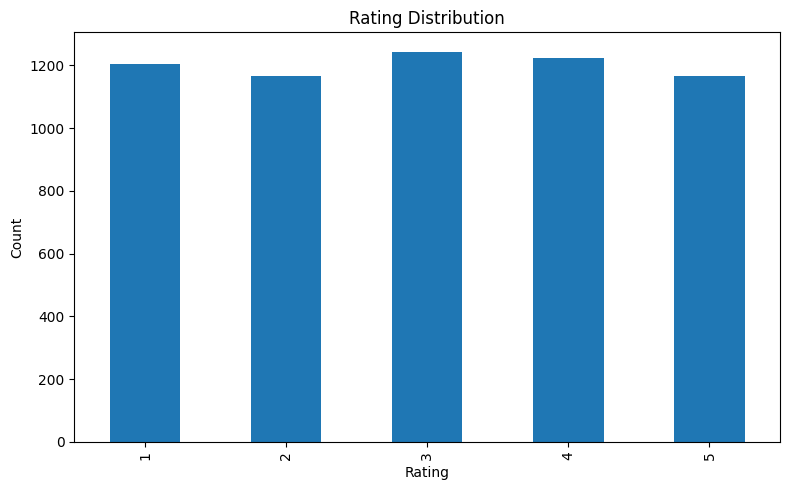

In [16]:
plt.figure(figsize=(8,5))
df['rating'].value_counts().sort_index().plot(kind='bar')
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

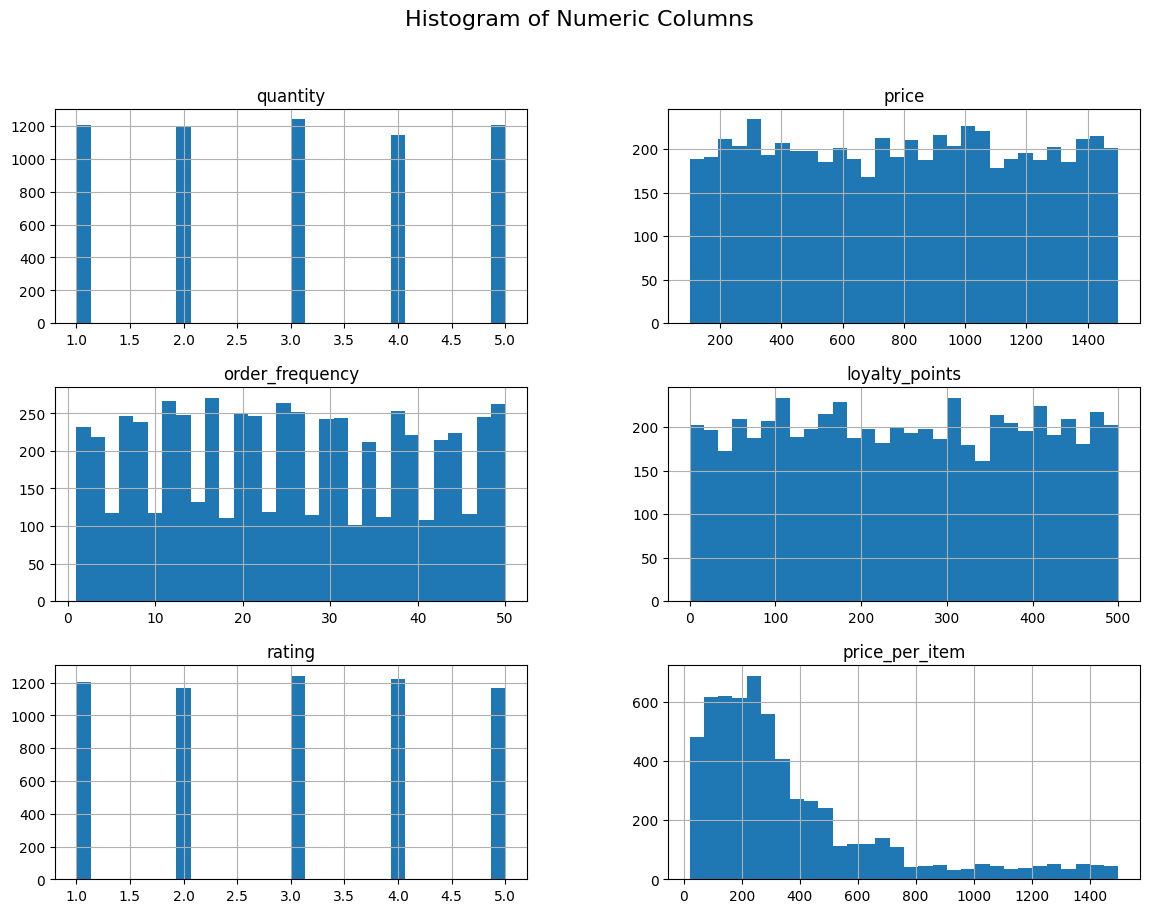

In [17]:

# กราฟ histogram แสดงการกระจายของตัวเลข
numeric_cols.hist(bins=30, figsize=(14, 10))
plt.suptitle("Histogram of Numeric Columns", fontsize=16)
plt.show()


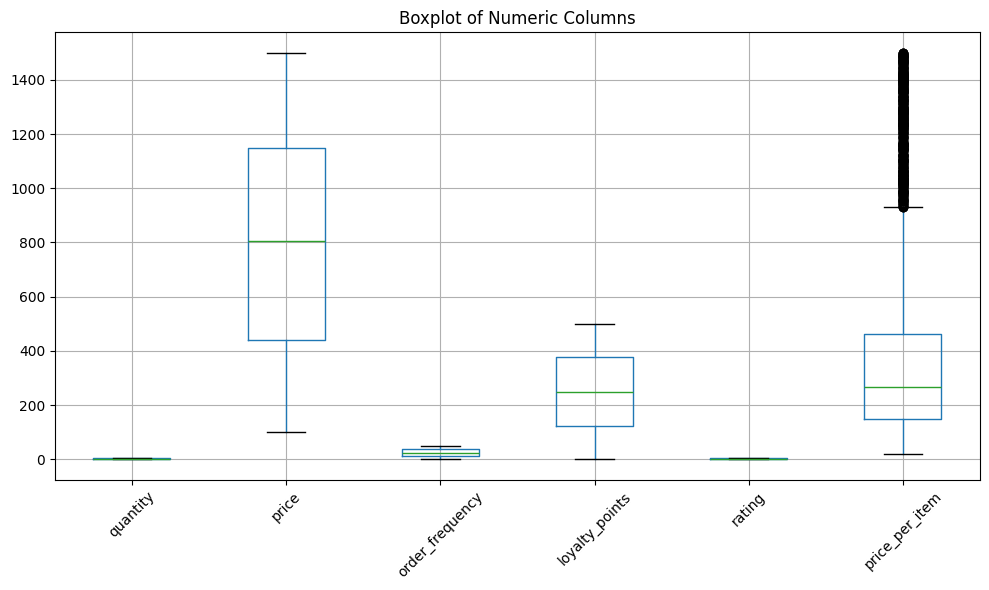

In [18]:
plt.figure(figsize=(10,6))
numeric_cols.boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot of Numeric Columns")
plt.tight_layout()
plt.show()

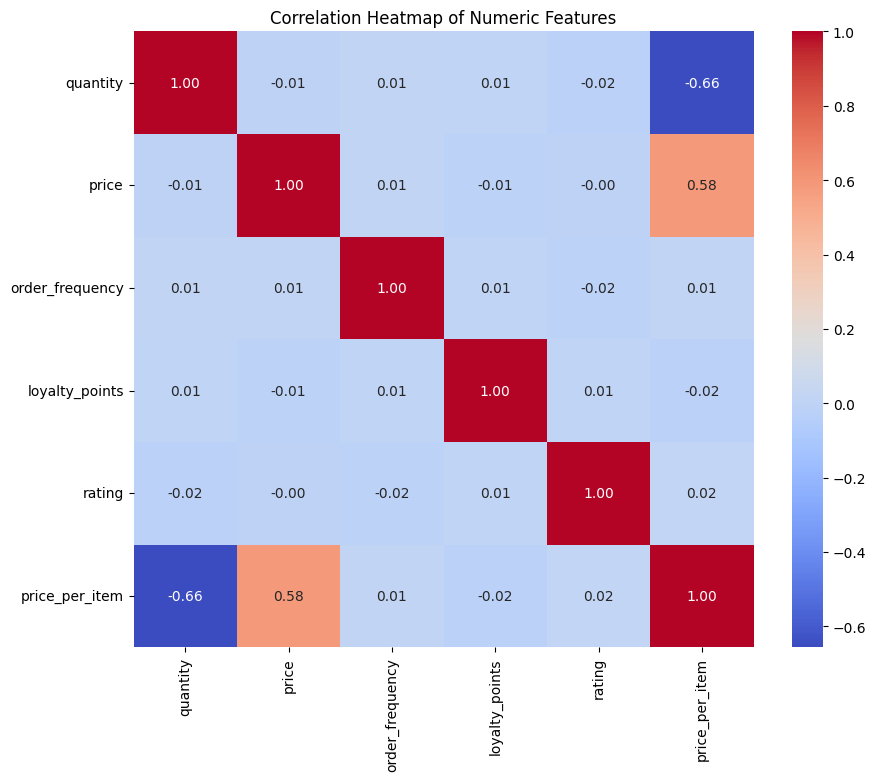

In [19]:
# correlation matrix
corr = numeric_cols.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


In [20]:
df['churn_flag'] = df['churned'].map({'Active': 0, 'Inactive': 1})
df['customer_tenure_days'] = (
    df['order_date'].max() - df['signup_date']
).dt.days
df['avg_days_between_orders'] = (
    df['customer_tenure_days'] / (df['order_frequency'] + 1)
)

df['recent_intensity'] = (
    df['order_frequency'] / (df['customer_tenure_days'] + 1)
)


In [21]:
df.head()

,customer_id,gender,age,city,signup_date,order_id,order_date,restaurant_name,dish_name,category,...,loyalty_points,churned,rating,rating_date,delivery_status,price_per_item,churn_flag,customer_tenure_days,avg_days_between_orders,recent_intensity
0,C5663,Male,Adult,Peshawar,2024-01-14,O9663,2023-08-23,McDonald's,Burger,Italian,...,238,Active,3,2024-10-14,Cancelled,295.654,0,586,15.025641,0.064736
1,C2831,Male,Adult,Multan,2024-07-07,O6831,2023-08-23,KFC,Burger,Italian,...,81,Active,2,2025-08-21,Delayed,318.680,0,411,16.440000,0.058252
2,C2851,Other,Senior,Multan,2025-06-20,O6851,2023-08-23,Pizza Hut,Fries,Italian,...,82,Inactive,3,2024-09-19,Delayed,441.255,1,63,1.465116,0.656250
3,C1694,Female,Senior,Peshawar,2023-09-05,O5694,2023-08-23,Subway,Pizza,Dessert,...,45,Inactive,2,2025-06-29,Delayed,57.825,1,717,25.607143,0.037604
4,C4339,Other,Senior,Lahore,2023-12-29,O8339,2023-08-24,KFC,Sandwich,Dessert,...,418,Inactive,3,2025-03-06,Cancelled,1156.690,1,602,16.722222,0.058043



📌 Average Price by Churn vs Active:
churned
Active      799.117440
Inactive    801.947413
Name: price, dtype: float64


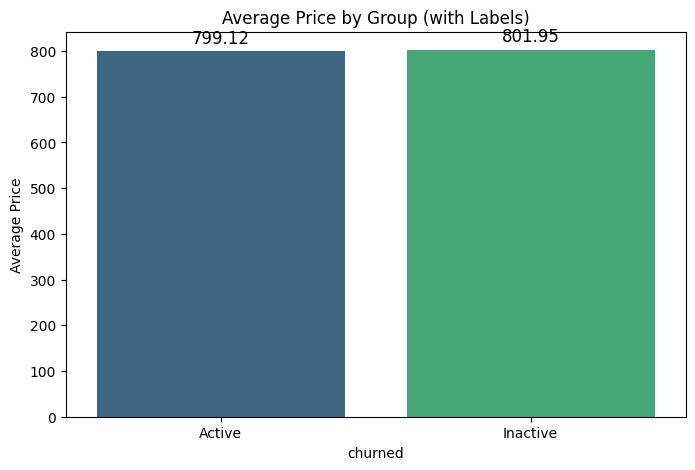


📌 Order Count by Churn vs Active:
churned
Active      3016
Inactive    2984
Name: order_id, dtype: int64


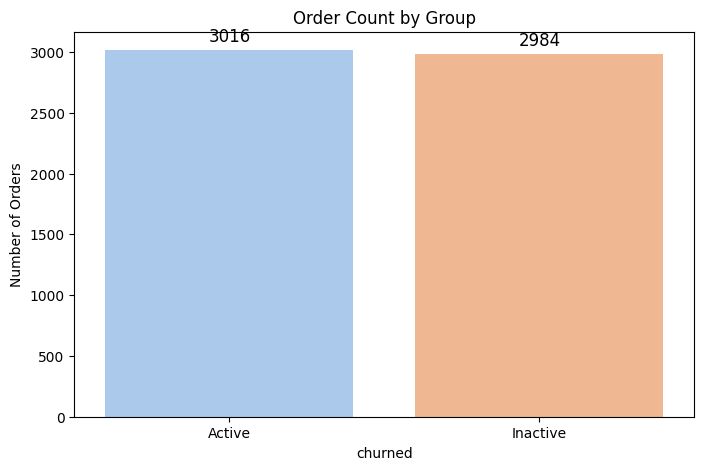

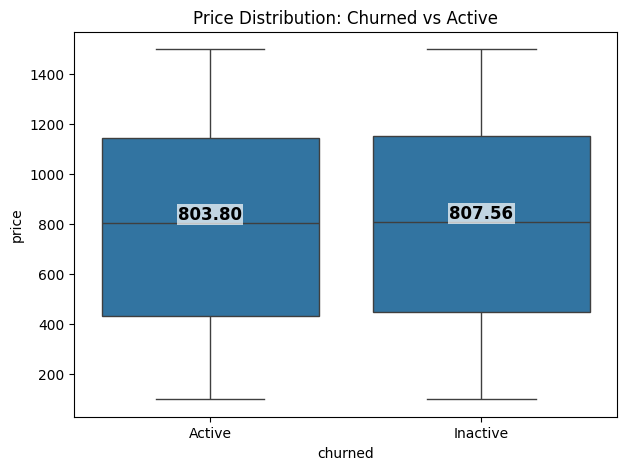

In [22]:
# แปลง churn เป็นเลข
df['churn_flag'] = df['churned'].map({'Active': 0, 'Inactive': 1})

# Insight 1: ค่าเฉลี่ยยอดใช้จ่ายของสองกลุ่ม
avg_sales = df.groupby('churned')['price'].mean()
# Convert the Series to DataFrame for seaborn
avg_sales_df = avg_sales.reset_index()
avg_sales_df.columns = ['churned', 'price'] # Rename columns for clarity

print("\n📌 Average Price by Churn vs Active:")
print(avg_sales)
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='churned', y='price', data=avg_sales_df, hue='churned', palette='viridis', legend=False)


for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3, fontsize=12, color='black')
# ---------------------------------------

plt.title("Average Price by Group (with Labels)")
plt.ylabel("Average Price")
plt.show()

# Insight 2: จำนวนออเดอร์ของแต่ละกลุ่ม
orders = df.groupby('churned')['order_id'].count()
orders_df = orders.reset_index()
orders_df.columns = ['churned', 'count'] # Rename columns for clarity

print("\n📌 Order Count by Churn vs Active:")
print(orders)
# สร้างกราฟ
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='churned', y='count', data=orders_df, hue='churned', palette='pastel', legend=False)


for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3, fontsize=12)


plt.title("Order Count by Group")
plt.ylabel("Number of Orders")
plt.show()

# Insight 3: กราฟเปรียบเทียบยอดใช้จ่าย
plt.figure(figsize=(7, 5))

# 1. สร้างกราฟและเก็บไว้ในตัวแปร ax
ax = sns.boxplot(x='churned', y='price', data=df)

# 2. คำนวณค่า Median ของแต่ละกลุ่ม
medians = df.groupby('churned')['price'].median()


xticklabels = [label.get_text() for label in ax.get_xticklabels()]

for i, label in enumerate(xticklabels):

    val = medians[label]

    ax.text(i, val, f'{val:.2f}',
            ha='center', va='bottom',
            fontweight='bold', color='black', fontsize=12,
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1))

plt.title("Price Distribution: Churned vs Active")
plt.show()

In [23]:

print(df[['price', 'churned']].info())
print(df['churned'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   price    6000 non-null   float64
 1   churned  6000 non-null   object 
dtypes: float64(1), object(1)
memory usage: 93.9+ KB
None
churned
Active      3016
Inactive    2984
Name: count, dtype: int64


In [24]:
active_sales = df[df['churned'] == 'Active']['price']
inactive_sales = df[df['churned'] == 'Inactive']['price']

print('Active mean price:', active_sales.mean())
print('Inactive mean price:', inactive_sales.mean())



Active mean price: 799.1174403183024
Inactive mean price: 801.9474128686327


In [25]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(
    active_sales,
    inactive_sales,
    equal_var=False
)

print('T-statistic:', t_stat)
print('P-value:', p_value)


T-statistic: -0.2707287269163191
P-value: 0.7866089969016883


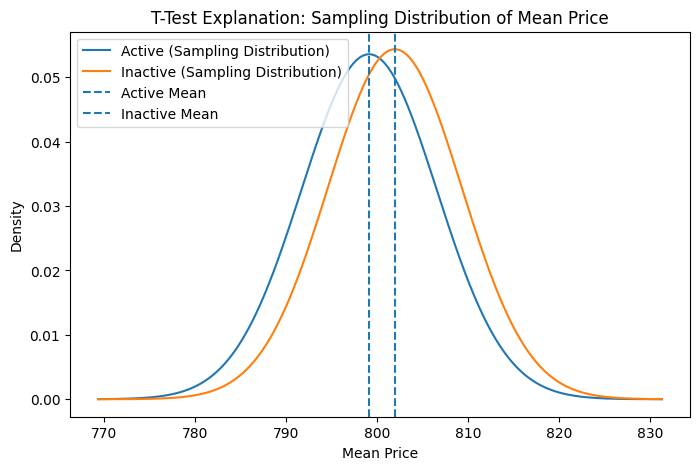

In [26]:
from scipy.stats import norm

# ค่าเฉลี่ยและส่วนเบี่ยงเบน
mean_active = active_sales.mean()
mean_inactive = inactive_sales.mean()

std_active = active_sales.std()
std_inactive = inactive_sales.std()

n_active = active_sales.shape[0]
n_inactive = inactive_sales.shape[0]

# Standard Error
se_active = std_active / np.sqrt(n_active)
se_inactive = std_inactive / np.sqrt(n_inactive);

# ===============================
# สร้างแกน x สำหรับกราฟ
# ===============================
x_min = min(mean_active - 4*se_active, mean_inactive - 4*se_inactive)
x_max = max(mean_active + 4*se_active, mean_inactive + 4*se_inactive)
x = np.linspace(x_min, x_max, 500)

# ===============================
# Normal Distribution
# ===============================
y_active = norm.pdf(x, mean_active, se_active)
y_inactive = norm.pdf(x, mean_inactive, se_inactive)

# ===============================
# Plot
# ===============================
plt.figure(figsize=(8,5))

plt.plot(x, y_active, label='Active (Sampling Distribution)')
plt.plot(x, y_inactive, label='Inactive (Sampling Distribution)')

# เส้นค่าเฉลี่ย
plt.axvline(mean_active, linestyle='--', label='Active Mean')
plt.axvline(mean_inactive, linestyle='--', label='Inactive Mean')

plt.title('T-Test Explanation: Sampling Distribution of Mean Price')
plt.xlabel('Mean Price')
plt.ylabel('Density')
plt.legend()
plt.show()

# Machine **Learning**

# Random Forest

Fitting 5 folds for each of 16 candidates, totalling 80 fits

✅ Best Params: {'clf__max_depth': 10, 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 5, 'clf__min_samples_split': 2, 'clf__n_estimators': 600}
✅ Best CV Recall (Churn=1): 0.5115014517161829

Test Accuracy: 0.5125
Test Recall (Churn=1): 0.5159
Test ROC-AUC: 0.5218

Confusion Matrix:
 [[307 296]
 [289 308]]

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.51      0.51       603
           1       0.51      0.52      0.51       597

    accuracy                           0.51      1200
   macro avg       0.51      0.51      0.51      1200
weighted avg       0.51      0.51      0.51      1200



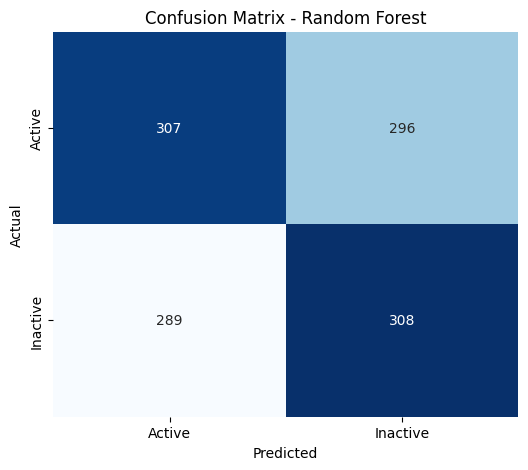

In [74]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, recall_score, roc_auc_score, accuracy_score
from sklearn.metrics import make_scorer

# =========================
# 1) Customer-level features
# =========================
for c in ['signup_date','order_date','last_order_date','rating_date']:
    df[c] = pd.to_datetime(df[c], errors='coerce')

df['price_per_item'] = df['price'] / df['quantity'].replace(0, np.nan)
df['churn_flag'] = df['churned'].map({'Active': 0, 'Inactive': 1})

ref_date = df['order_date'].max()

cust = df.groupby('customer_id').agg(
    churn_flag=('churn_flag','max'),
    gender=('gender','first'),
    age=('age','first'),
    city=('city','first'),

    signup_date=('signup_date','min'),
    last_order_date=('order_date','max'),

    total_orders=('order_id','nunique'),
    total_spend=('price','sum'),
    avg_order_value=('price','mean'),
    avg_quantity=('quantity','mean'),
    avg_price_per_item=('price_per_item','mean'),

    order_frequency=('order_frequency','max'),
    loyalty_points=('loyalty_points','max'),
    avg_rating=('rating','mean'),

    delivered_rate=('delivery_status', lambda s: (s == 'Delivered').mean()),
).reset_index()

cust['customer_tenure_days'] = (ref_date - cust['signup_date']).dt.days
cust['days_since_last_order'] = (ref_date - cust['last_order_date']).dt.days
cust['orders_per_tenure'] = cust['total_orders'] / (cust['customer_tenure_days'] + 1)

y = cust['churn_flag'].astype(int)

features = [
    'gender','age','city',
    'total_orders','total_spend','avg_order_value','avg_quantity','avg_price_per_item',
    'order_frequency','loyalty_points','avg_rating',
    'delivered_rate','customer_tenure_days','days_since_last_order','orders_per_tenure'
]
X = cust[features].copy()

# =========================
# 2) Split
# =========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# =========================
# 3) Preprocess in Pipeline
# =========================
numeric_features = X.select_dtypes(include=['number']).columns.tolist()
categorical_features = [c for c in X.columns if c not in numeric_features]

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="drop"
)

# =========================
# 4) Model + GridSearchCV (เน้น Recall churn=1)
# =========================
rf = RandomForestClassifier(
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

pipe = Pipeline(steps=[
    ("preprocess", preprocess),
    ("clf", rf)
])

# scorer: recall ของ class 1
recall_scorer = make_scorer(recall_score, pos_label=1)

param_grid = {
 "clf__n_estimators": [300, 600],
    "clf__max_depth": [None, 10],
    "clf__min_samples_split": [2, 10],
    "clf__min_samples_leaf": [1, 5],
    "clf__max_features": ["sqrt"]
}

grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring=recall_scorer,
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)

best_rf = grid.best_estimator_

# =========================
# 5) Evaluate on Test
# =========================
y_pred = best_rf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
rec = recall_score(y_test, y_pred, pos_label=1)

print("\n✅ Best Params:", grid.best_params_)
print("✅ Best CV Recall (Churn=1):", grid.best_score_)

print("\nTest Accuracy:", round(acc, 4))
print("Test Recall (Churn=1):", round(rec, 4))


if hasattr(best_rf, "predict_proba"):
    y_prob = best_rf.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_prob)
    print("Test ROC-AUC:", round(auc, 4))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues', cbar=False,
    xticklabels=['Active', 'Inactive'],
    yticklabels=['Active', 'Inactive']
)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()


# LogisticRegression

Fitting 5 folds for each of 16 candidates, totalling 80 fits

✅ Best Params: {'clf__C': 1, 'clf__class_weight': 'balanced', 'clf__solver': 'liblinear'}
✅ Best CV Recall (Churn=1): 0.5123531836881485

Test Accuracy: 0.4975
Test Recall (Churn=1): 0.4841
Test ROC-AUC: 0.4951

Confusion Matrix:
 [[308 295]
 [308 289]]

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.51      0.51       603
           1       0.49      0.48      0.49       597

    accuracy                           0.50      1200
   macro avg       0.50      0.50      0.50      1200
weighted avg       0.50      0.50      0.50      1200



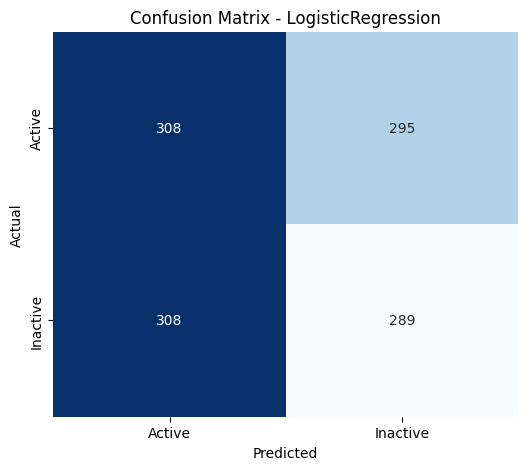

In [95]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, recall_score, roc_auc_score, accuracy_score
from sklearn.metrics import make_scorer


for c in ['signup_date','order_date','last_order_date','rating_date']:
    df[c] = pd.to_datetime(df[c], errors='coerce')

df['price_per_item'] = df['price'] / df['quantity'].replace(0, np.nan)
df['churn_flag'] = df['churned'].map({'Active': 0, 'Inactive': 1})

ref_date = df['order_date'].max()

cust = df.groupby('customer_id').agg(
    churn_flag=('churn_flag','max'),
    gender=('gender','first'),
    age=('age','first'),
    city=('city','first'),

    signup_date=('signup_date','min'),
    last_order_date=('order_date','max'),

    total_orders=('order_id','nunique'),
    total_spend=('price','sum'),
    avg_order_value=('price','mean'),
    avg_quantity=('quantity','mean'),
    avg_price_per_item=('price_per_item','mean'),

    order_frequency=('order_frequency','max'),
    loyalty_points=('loyalty_points','max'),
    avg_rating=('rating','mean'),

    delivered_rate=('delivery_status', lambda s: (s == 'Delivered').mean()),
).reset_index()

cust['customer_tenure_days'] = (ref_date - cust['signup_date']).dt.days
cust['days_since_last_order'] = (ref_date - cust['last_order_date']).dt.days
cust['orders_per_tenure'] = cust['total_orders'] / (cust['customer_tenure_days'] + 1)

y = cust['churn_flag'].astype(int)

features = [
   'gender','age','city',
    'total_orders','total_spend','avg_order_value','avg_quantity','avg_price_per_item',
    'order_frequency','loyalty_points','avg_rating',
    'delivered_rate','customer_tenure_days','days_since_last_order','orders_per_tenure'
]
X = cust[features].copy()

# =========================
# 2) Split
# =========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# =========================
# 3) Preprocess in Pipeline
# =========================
numeric_features = X.select_dtypes(include=['number']).columns.tolist()
categorical_features = [c for c in X.columns if c not in numeric_features]

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())   # ✅ Logistic ต้อง scale
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="drop"
)

# =========================
# 4) Logistic + GridSearchCV (เน้น Recall churn=1)
# =========================
logreg = LogisticRegression(
    max_iter=3000,
    random_state=42
)

pipe = Pipeline(steps=[
    ("preprocess", preprocess),
    ("clf", logreg)
])

recall_scorer = make_scorer(recall_score, pos_label=1)

param_grid = {
    "clf__C": [0.01, 0.1, 1, 10],
    "clf__solver": ["lbfgs", "liblinear"],
    "clf__class_weight": [None, "balanced"]
}

grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring=recall_scorer,   # ✅ เน้น Recall (Churn=1)
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)

best = grid.best_estimator_

# =========================
# 5) Evaluate on Test
# =========================
y_pred = best.predict(X_test)

acc = accuracy_score(y_test, y_pred)
rec = recall_score(y_test, y_pred, pos_label=1)

print("\n✅ Best Params:", grid.best_params_)
print("✅ Best CV Recall (Churn=1):", grid.best_score_)

print("\nTest Accuracy:", round(acc, 4))
print("Test Recall (Churn=1):", round(rec, 4))

if hasattr(best, "predict_proba"):
    y_prob = best.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_prob)
    print("Test ROC-AUC:", round(auc, 4))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues', cbar=False,
    xticklabels=['Active', 'Inactive'],
    yticklabels=['Active', 'Inactive']
)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - LogisticRegression')
plt.show()

# LightGBM

Fitting 3 folds for each of 4 candidates, totalling 12 fits

✅ Best Params: {'clf__colsample_bytree': 0.8, 'clf__learning_rate': 0.05, 'clf__max_depth': -1, 'clf__n_estimators': 200, 'clf__num_leaves': 63, 'clf__subsample': 0.8}
✅ Best CV Recall (Churn=1): 0.503140966888952

Test Accuracy: 0.5125
Test Recall (Churn=1): 0.5075
Test ROC-AUC: 0.5252

Confusion Matrix:
 [[312 291]
 [294 303]]

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.52      0.52       603
           1       0.51      0.51      0.51       597

    accuracy                           0.51      1200
   macro avg       0.51      0.51      0.51      1200
weighted avg       0.51      0.51      0.51      1200



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


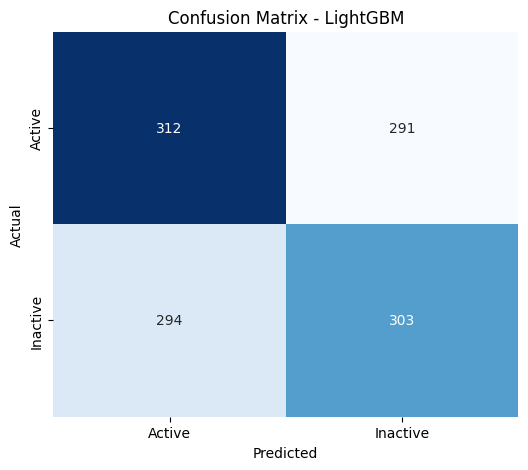

In [94]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.metrics import classification_report, confusion_matrix, recall_score, roc_auc_score, accuracy_score
from sklearn.metrics import make_scorer

import lightgbm as lgb

# =========================
# 1) Customer-level features (เหมือนเดิม)
# =========================
for c in ['signup_date','order_date','last_order_date','rating_date']:
    df[c] = pd.to_datetime(df[c], errors='coerce')

df['price_per_item'] = df['price'] / df['quantity'].replace(0, np.nan)
df['churn_flag'] = df['churned'].map({'Active': 0, 'Inactive': 1})

ref_date = df['order_date'].max()

cust = df.groupby('customer_id').agg(
    churn_flag=('churn_flag','max'),
    gender=('gender','first'),
    age=('age','first'),
    city=('city','first'),

    signup_date=('signup_date','min'),
    last_order_date=('order_date','max'),

    total_orders=('order_id','nunique'),
    total_spend=('price','sum'),
    avg_order_value=('price','mean'),
    avg_quantity=('quantity','mean'),
    avg_price_per_item=('price_per_item','mean'),

    order_frequency=('order_frequency','max'),
    loyalty_points=('loyalty_points','max'),
    avg_rating=('rating','mean'),

    delivered_rate=('delivery_status', lambda s: (s == 'Delivered').mean()),
).reset_index()

cust['customer_tenure_days'] = (ref_date - cust['signup_date']).dt.days
cust['days_since_last_order'] = (ref_date - cust['last_order_date']).dt.days
cust['orders_per_tenure'] = cust['total_orders'] / (cust['customer_tenure_days'] + 1)

y = cust['churn_flag'].astype(int)

features = [
   'gender','age','city',
    'total_orders','total_spend','avg_order_value','avg_quantity','avg_price_per_item',
    'order_frequency','loyalty_points','avg_rating',
    'delivered_rate','customer_tenure_days','days_since_last_order','orders_per_tenure'
]
X = cust[features].copy()

# =========================
# 2) Split
# =========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# =========================
# 3) Preprocess in Pipeline
# =========================
numeric_features = X.select_dtypes(include=['number']).columns.tolist()
categorical_features = [c for c in X.columns if c not in numeric_features]

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="drop"
)

# =========================
# 4) LightGBM + GridSearchCV (เน้น Recall churn=1)
# =========================
lgbm = lgb.LGBMClassifier(
    objective="binary",
    class_weight="balanced",
    random_state=42,
    n_jobs=-1,
     verbose=-1
)

pipe = Pipeline(steps=[
    ("preprocess", preprocess),
    ("clf", lgbm)
])

recall_scorer = make_scorer(recall_score, pos_label=1)


param_grid = {
  "clf__n_estimators": [200, 400],
    "clf__learning_rate": [0.05],
    "clf__num_leaves": [31, 63],
    "clf__max_depth": [-1],
    "clf__subsample": [0.8],
    "clf__colsample_bytree": [0.8]
}

grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring=recall_scorer,
    cv=3,
    n_jobs=-1,
   verbose =1
)

grid.fit(X_train, y_train)

best_lgbm = grid.best_estimator_

# =========================
# 5) Evaluate on Test
# =========================
y_pred = best_lgbm.predict(X_test)

acc = accuracy_score(y_test, y_pred)
rec = recall_score(y_test, y_pred, pos_label=1)

print("\n✅ Best Params:", grid.best_params_)
print("✅ Best CV Recall (Churn=1):", grid.best_score_)

print("\nTest Accuracy:", round(acc, 4))
print("Test Recall (Churn=1):", round(rec, 4))

y_prob = best_lgbm.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_prob)
print("Test ROC-AUC:", round(auc, 4))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues', cbar=False,
    xticklabels=['Active', 'Inactive'],
    yticklabels=['Active', 'Inactive']
)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - LightGBM')
plt.show()

# XGBOOST

Fitting 3 folds for each of 4 candidates, totalling 12 fits

✅ Best Params: {'clf__colsample_bytree': 0.8, 'clf__learning_rate': 0.05, 'clf__max_depth': 5, 'clf__n_estimators': 400, 'clf__subsample': 0.8}
✅ Best CV Recall (Churn=1): 0.5002112238340549

Test Accuracy: 0.5333
Test Recall (Churn=1): 0.5109
Test ROC-AUC: 0.5222

Confusion Matrix:
 [[335 268]
 [292 305]]

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.56      0.54       603
           1       0.53      0.51      0.52       597

    accuracy                           0.53      1200
   macro avg       0.53      0.53      0.53      1200
weighted avg       0.53      0.53      0.53      1200



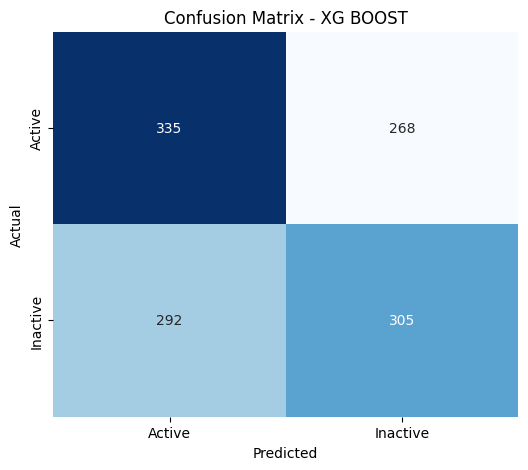

In [93]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.metrics import classification_report, confusion_matrix, recall_score, roc_auc_score, accuracy_score
from sklearn.metrics import make_scorer

import xgboost as xgb

# =========================
# 1) Customer-level features (เหมือนเดิม)
# =========================
for c in ['signup_date','order_date','last_order_date','rating_date']:
    df[c] = pd.to_datetime(df[c], errors='coerce')

df['price_per_item'] = df['price'] / df['quantity'].replace(0, np.nan)
df['churn_flag'] = df['churned'].map({'Active': 0, 'Inactive': 1})

ref_date = df['order_date'].max()

cust = df.groupby('customer_id').agg(
    churn_flag=('churn_flag','max'),
    gender=('gender','first'),
    age=('age','first'),
    city=('city','first'),

    signup_date=('signup_date','min'),
    last_order_date=('order_date','max'),

    total_orders=('order_id','nunique'),
    total_spend=('price','sum'),
    avg_order_value=('price','mean'),
    avg_quantity=('quantity','mean'),
    avg_price_per_item=('price_per_item','mean'),

    order_frequency=('order_frequency','max'),
    loyalty_points=('loyalty_points','max'),
    avg_rating=('rating','mean'),

    delivered_rate=('delivery_status', lambda s: (s == 'Delivered').mean()),
).reset_index()

cust['customer_tenure_days'] = (ref_date - cust['signup_date']).dt.days
cust['days_since_last_order'] = (ref_date - cust['last_order_date']).dt.days
cust['orders_per_tenure'] = cust['total_orders'] / (cust['customer_tenure_days'] + 1)

y = cust['churn_flag'].astype(int)

features = [
    'gender','age','city',
    'total_orders','total_spend','avg_order_value','avg_quantity','avg_price_per_item',
    'order_frequency','loyalty_points','avg_rating',
    'delivered_rate','customer_tenure_days','days_since_last_order','orders_per_tenure'
]
X = cust[features].copy()

# =========================
# 2) Split
# =========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# =========================
# 3) Preprocess in Pipeline
# =========================
numeric_features = X.select_dtypes(include=['number']).columns.tolist()
categorical_features = [c for c in X.columns if c not in numeric_features]

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="drop"
)

# =========================
# 4) XGBoost + GridSearchCV (เน้น Recall churn=1)
# =========================
xgb_clf = xgb.XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=42,
    n_jobs=-1,
    tree_method="hist"   # ✅ เร็วขึ้น (โดยเฉพาะข้อมูลใหญ่)
)

pipe = Pipeline(steps=[
    ("preprocess", preprocess),
    ("clf", xgb_clf)
])

recall_scorer = make_scorer(recall_score, pos_label=1)


param_grid = {
    "clf__n_estimators": [200, 400],
    "clf__max_depth": [3, 5],
    "clf__learning_rate": [0.05],
    "clf__subsample": [0.8],
    "clf__colsample_bytree": [0.8]
}

grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring=recall_scorer,
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)

best_xgb = grid.best_estimator_

# =========================
# 5) Evaluate on Test
# =========================
y_pred = best_xgb.predict(X_test)

acc = accuracy_score(y_test, y_pred)
rec = recall_score(y_test, y_pred, pos_label=1)

print("\n✅ Best Params:", grid.best_params_)
print("✅ Best CV Recall (Churn=1):", grid.best_score_)

print("\nTest Accuracy:", round(acc, 4))
print("Test Recall (Churn=1):", round(rec, 4))

y_prob = best_xgb.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_prob)
print("Test ROC-AUC:", round(auc, 4))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues', cbar=False,
    xticklabels=['Active', 'Inactive'],
    yticklabels=['Active', 'Inactive']
)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XG BOOST')
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


📌 Model comparison (sorted by Recall Churn=1)
                 Model  Recall (Churn=1)   ROC-AUC  Accuracy
0        Random Forest          0.515913  0.521763  0.512500
1              XGBoost          0.510888  0.522174  0.533333
2             LightGBM          0.507538  0.525191  0.512500
3  Logistic Regression          0.484087  0.495062  0.497500


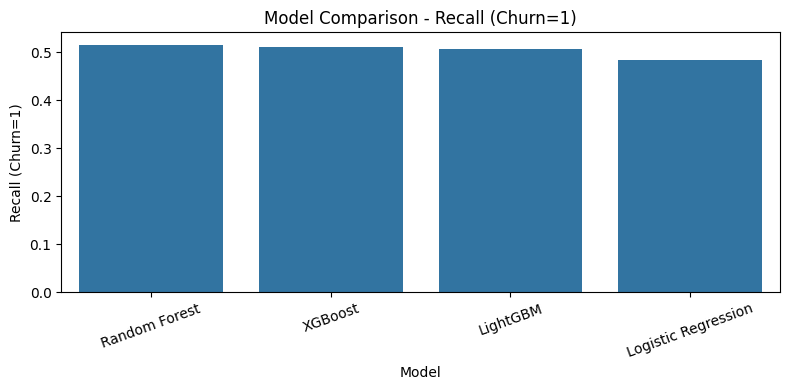

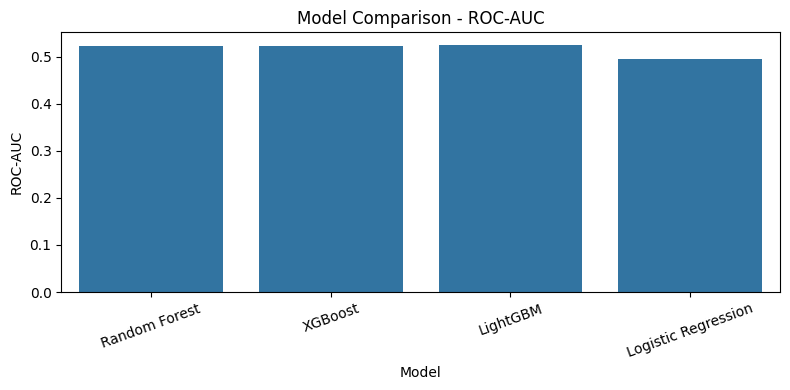

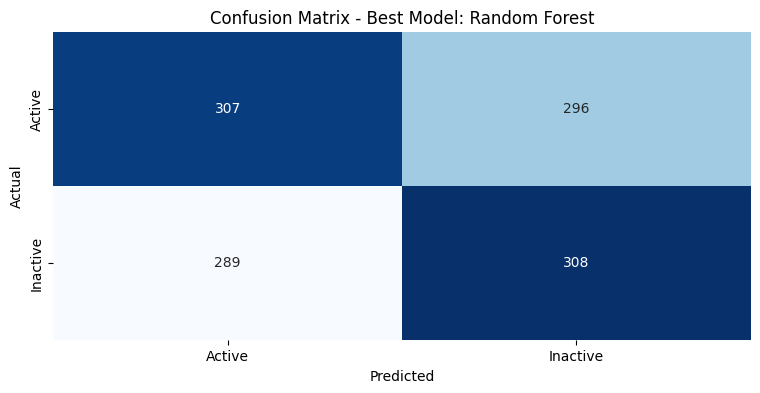

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import recall_score, accuracy_score, roc_auc_score, confusion_matrix


models = {
    "Random Forest": best_rf,
    "LightGBM": best_lgbm,
    "XGBoost": best_xgb,
    "Logistic Regression": best
}

results = []

for name, model in models.items():
    y_pred = model.predict(X_test)

    rec = recall_score(y_test, y_pred, pos_label=1)
    acc = accuracy_score(y_test, y_pred)

    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_prob)
    else:
        auc = None

    results.append({
        "Model": name,
        "Recall (Churn=1)": rec,
        "ROC-AUC": auc,
        "Accuracy": acc
    })

results_df = pd.DataFrame(results).sort_values("Recall (Churn=1)", ascending=False).reset_index(drop=True)
print("📌 Model comparison (sorted by Recall Churn=1)")
print(results_df)

# ----- Plot: Recall -----
plt.figure(figsize=(8,4))
sns.barplot(data=results_df, x="Model", y="Recall (Churn=1)")
plt.title("Model Comparison - Recall (Churn=1)")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


df_auc = results_df.dropna(subset=["ROC-AUC"]).copy()
if len(df_auc) > 0:
    plt.figure(figsize=(8,4))
    sns.barplot(data=df_auc, x="Model", y="ROC-AUC")
    plt.title("Model Comparison - ROC-AUC")
    plt.xticks(rotation=20)
    plt.tight_layout()
    plt.show()

best_name = results_df.loc[0, "Model"]
best_model = models[best_name]

y_pred_best = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(9,4))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues', cbar=False,
    xticklabels=['Active', 'Inactive'],
    yticklabels=['Active', 'Inactive']
)


sns.heatmap
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f"Confusion Matrix - Best Model: {best_name}")
plt.show()
